In [1]:
import xarray as xr

In [2]:
from sizedist_util import lognormal_julia

In [28]:
filelist = [
    '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9.nc',
    '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2016-01-01-2017-01-01_f_concat_subs_lon11.88_lat78.9.nc',
    '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2017-01-01-2018-01-01_f_concat_subs_lon11.88_lat78.9.nc',    
]

In [29]:
ls_ds = [xr.open_dataset(f, engine='netcdf4') for f in filelist]

In [30]:
import numpy as np

In [31]:
diameters = xr.DataArray(np.logspace(-8,-5,30), coords={'diameter':np.logspace(-8,-5,30)})

In [32]:
diameters

<xarray.DataArray (diameter: 30)>
array([1.00000000e-08, 1.26896100e-08, 1.61026203e-08, 2.04335972e-08,
       2.59294380e-08, 3.29034456e-08, 4.17531894e-08, 5.29831691e-08,
       6.72335754e-08, 8.53167852e-08, 1.08263673e-07, 1.37382380e-07,
       1.74332882e-07, 2.21221629e-07, 2.80721620e-07, 3.56224789e-07,
       4.52035366e-07, 5.73615251e-07, 7.27895384e-07, 9.23670857e-07,
       1.17210230e-06, 1.48735211e-06, 1.88739182e-06, 2.39502662e-06,
       3.03919538e-06, 3.85662042e-06, 4.89390092e-06, 6.21016942e-06,
       7.88046282e-06, 1.00000000e-05])
Coordinates:
  * diameter  (diameter) float64 1e-08 1.269e-08 1.61e-08 ... 7.88e-06 1e-05

In [33]:
for ds in ls_ds:
    ds['SIGMA00'] =  1.6  # Kirkevag et al 2018
    ds['SIGMA00'].attrs['units'] = '-'  # Kirkevag et al 2018
    ds['NMR00'] =   62.6e-9  # nm Kirkevag et al 2018
    ds['NMR00'].attrs['units'] = 'm'  # nm Kirkevag et al 2018
    ds['NCONC00'] = ds['NNAT_0']

In [34]:
def change_units_NCONC(ds):
    

    for i in range(0,15):
        v = f'NCONC{i:02d}'
        print(v)
        if v in ds:
            print(v)
            if ds[v].attrs['units'] =='#/m3':
                ds[v] = ds[v]*1.0e-6
                ds[v].attrs['units'] = 'cm-3'
    return ds

In [35]:
for ds in ls_ds:
    ds = change_units_NCONC(ds)

NCONC00
NCONC00
NCONC01
NCONC01
NCONC02
NCONC02
NCONC03
NCONC03
NCONC04
NCONC04
NCONC05
NCONC05
NCONC06
NCONC06
NCONC07
NCONC07
NCONC08
NCONC08
NCONC09
NCONC09
NCONC10
NCONC10
NCONC11
NCONC11
NCONC12
NCONC12
NCONC13
NCONC13
NCONC14
NCONC14
NCONC00
NCONC00
NCONC01
NCONC01
NCONC02
NCONC02
NCONC03
NCONC03
NCONC04
NCONC04
NCONC05
NCONC05
NCONC06
NCONC06
NCONC07
NCONC07
NCONC08
NCONC08
NCONC09
NCONC09
NCONC10
NCONC10
NCONC11
NCONC11
NCONC12
NCONC12
NCONC13
NCONC13
NCONC14
NCONC14
NCONC00
NCONC00
NCONC01
NCONC01
NCONC02
NCONC02
NCONC03
NCONC03
NCONC04
NCONC04
NCONC05
NCONC05
NCONC06
NCONC06
NCONC07
NCONC07
NCONC08
NCONC08
NCONC09
NCONC09
NCONC10
NCONC10
NCONC11
NCONC11
NCONC12
NCONC12
NCONC13
NCONC13
NCONC14
NCONC14


In [79]:
def calc_total_sizedist(ds):
    

    if 'diameter' in ds.coords:
        if len(ds['diameter']==50):
            print('hey')
               

    ds_out =xr.Dataset()
    for i in range(0,15):
        nstr = f'{i:02d}'
        v_out = f'dNdlogD{nstr}'
        nconc = ds[f'NCONC{nstr}']
        sigma = ds[f'SIGMA{nstr}']
        nmr = ds[f'NMR{nstr}']
        ds_out[v_out] = lognormal_julia(diameters, nconc,nmr,sigma)



        
    if 'diameter' in ds.coords:
        if len(ds['diameter']==50):
            drop_vars = [d for d in ds.data_vars if 'dNdlog' in d] + ['diameter']
            print(drop_vars)
            ds = ds.drop(drop_vars)
            

    da_out = ds_out.to_array(name='dNdlogD', dim='mode')

    ds['dNdlogD_mode'] =da_out
    
    print('hey')
    ds['dNdlogD'] = da_out.sum('mode')
    

    return ds, da_out

In [83]:
for i, ds in enumerate(ls_ds):
    print(i)
    ds, da = calc_total_sizedist(ds)
    ls_ds[i] = ds

0
hey
['dNdlogD_mode', 'diameter']
hey
1
hey
['dNdlogD_mode', 'dNdlogD', 'diameter']
hey
2
hey
['dNdlogD_mode', 'dNdlogD', 'diameter']
hey


In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from sizedist_util import calc_Nd_interval_NorESM

In [52]:
list_di = [5,50,60,70,100, 150,200,300,500]

In [86]:
for i, ds in enumerate(ls_ds):
    for dmi in list_di:
        varn = f'N{dmi}'
        print(varn)
        da_Nd = calc_Nd_interval_NorESM(ds,dmi*1e-9,1, varn)
        ds[varn] = da_Nd
    ls_ds[i] = ds

N5
NCONC00
N50
NCONC00
N60
NCONC00
N70
NCONC00
N100
NCONC00
N150
NCONC00
N200
NCONC00
N300
NCONC00
N500
NCONC00
N5
NCONC00
N50
NCONC00
N60
NCONC00
N70
NCONC00
N100
NCONC00
N150
NCONC00
N200
NCONC00
N300
NCONC00
N500
NCONC00
N5
NCONC00
N50
NCONC00
N60
NCONC00
N70
NCONC00
N100
NCONC00
N150
NCONC00
N200
NCONC00
N300
NCONC00
N500
NCONC00


In [87]:
from pathlib import Path

In [88]:
filelist

['/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9.nc',
 '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2016-01-01-2017-01-01_f_concat_subs_lon11.88_lat78.9.nc',
 '/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2017-01-01-2018-01-01_f_concat_subs_lon11.88_lat78.9.nc']

In [94]:
for ds, f in zip(ls_ds, filelist):
    print(f)
    
    f = Path(f)
    fn = f.parent / f'{f.stem}_addNd.nc'
    print(fn)
    ds.to_netcdf(fn)
    print(fn)

/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9.nc
/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9_addNd.nc
/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9_addNd.nc
/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2016-01-01-2017-01-01_f_concat_subs_lon11.88_lat78.9.nc
/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2016-01-01-2017-01-01_f_concat_subs_lon11.88_lat78.9_addNd.nc
/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/e

In [95]:
ds = xr.open_dataset('/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2015-01-01-2016-01-01_f_concat_subs_lon11.88_lat78.9_addNd.nc')


In [96]:
ds

<xarray.Dataset>
Dimensions:          (diameter: 50, time: 8784, lat: 1, lon: 1, lev: 32, ilev: 33, nbnd: 2, mode: 15)
Coordinates:
  * diameter         (diameter) float64 1e-08 1.151e-08 ... 8.685e-06 1e-05
  * ilev             (ilev) float64 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * lat              (lat) float64 78.63
  * lev              (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon              (lon) float64 12.5
  * time             (time) datetime64[ns] 2016-01-02 ... 2017-01-01T23:00:00
  * mode             (mode) object 'dNdlogD00' 'dNdlogD01' ... 'dNdlogD14'
Dimensions without coordinates: nbnd
Data variables: (12/230)
    ABSVIS           (time, lat, lon) float32 ...
    ACTNI            (time, lat, lon) float32 ...
    ACTNL            (time, lat, lon) float32 ...
    ACTREI           (time, lat, lon) float32 ...
    ACTREL           (time, lat, lon) float32 ...
    AEROD_v          (time, lat, lon) float32 ...
    ...               ...
    N70              (time, lev, lat, lon) float32 ...
    N100             (time, lev, lat, lon) float32 ...
    N150             (time, lev, lat, lon) float32 ...
    N200             (time, lev, lat, lon) float32 ...
    N300             (time, lev, lat, lon) float32 ...
    N500             (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAeroSec_intBVOC_f19_f19_mg17_ssp245
    logname:           x_sarbl
    host:              
    initial_file:      OsloAeroSec_intBVOC_f19_f19_mg17_full.cam.i.2015-01-01...
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Nov  3 19:41:18 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [98]:
ds['dNdlogD']

<xarray.DataArray 'dNdlogD' (time: 8784, lev: 32, lat: 1, lon: 1, diameter: 50)>
[14054400 values with dtype=float64]
Coordinates:
  * diameter  (diameter) float64 1e-08 1.151e-08 1.326e-08 ... 8.685e-06 1e-05
  * lat       (lat) float64 78.63
  * lev       (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * lon       (lon) float64 12.5
  * time      (time) datetime64[ns] 2016-01-02 ... 2017-01-01T23:00:00

In [21]:
f.parent / f'{f.stem}_addNd.nc'

PosixPath('/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK_eScience/extracted_fields/OsloAeroSec_intBVOC_f19_f19_mg17_ssp245.h1._2017-01-01-2018-01-01_f_concat_subs_lon11.88_lat78.9_addNd.nc')

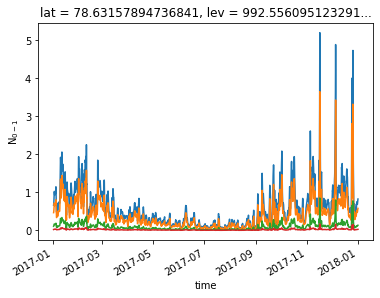

In [22]:
ds['N50'].isel(lev=-1).plot()
ds['N100'].isel(lev=-1).plot()
ds['N200'].isel(lev=-1).plot()
ds['N300'].isel(lev=-1).plot()
